Kindly use the following files to get the best results :



1.   *Glove text link :* [glove.6B.100d.txt](https://drive.google.com/file/d/1sstq1JCQ3ftwGIodaopf-zm7QHz3Sn38/view?usp=sharing)
2.   *Dataset link (same as provided) :* [IMDB Dataset.csv](https://drive.google.com/file/d/1MlG38QzdkVJ7It_7lECjHtNrF_P2NsPm/view?usp=sharing)
3.   Original Google Colab link : [Colab Link](https://colab.research.google.com/drive/19NgCdh2PKjjx1TLwdPd3sFASmv4g40Nz?usp=sharing)



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Logistic Regression**

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def preprocess_text(text_column):
    text_column = text_column.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())
    text_column = text_column.apply(lambda x: re.sub(r'\d+', '', x))
    text_column = text_column.apply(word_tokenize)
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    text_column = text_column.apply(lambda x: [word for word in x if word not in stop_words])
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    text_column = text_column.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    text_column = text_column.apply(lambda x: ' '.join(x))
    return text_column

raw_data = pd.read_csv('IMDB Dataset.csv')
main_data = raw_data.copy()
main_data['sentiment'] = main_data['sentiment'].map({'negative': 0, 'positive': 1})
X = main_data['review']
Y = main_data['sentiment']
X = preprocess_text(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=3)
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

model = LogisticRegression()
model.fit(X_train_features, Y_train)

prediction_on_test_data = model.predict(X_test_features)
lr_report = classification_report(Y_test, prediction_on_test_data, output_dict=True)
print(classification_report(Y_test, prediction_on_test_data))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4956
           1       0.88      0.90      0.89      5044

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



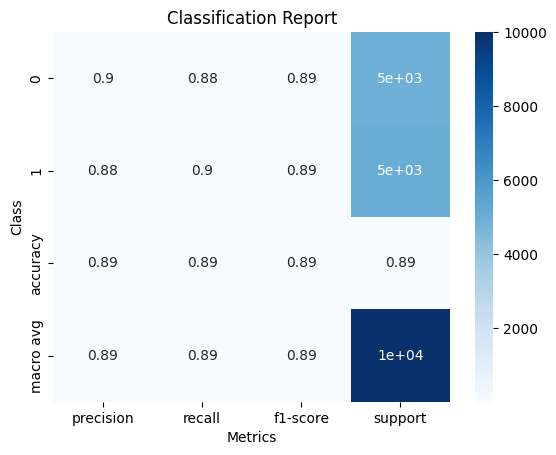

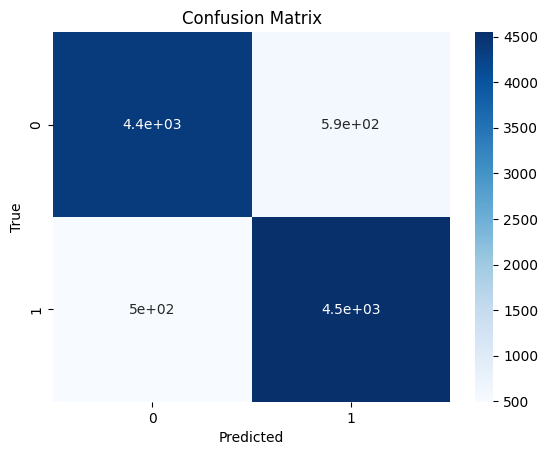

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
report = classification_report(Y_test, prediction_on_test_data, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].astype(float), annot=True, cmap='Blues')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')
plt.show()

cm = confusion_matrix(Y_test, prediction_on_test_data)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Naive Bayes**

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def preprocess_text(text_column):
    text_column = text_column.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())
    text_column = text_column.apply(lambda x: re.sub(r'\d+', '', x))
    text_column = text_column.apply(word_tokenize)
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    text_column = text_column.apply(lambda x: [word for word in x if word not in stop_words])
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    text_column = text_column.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    text_column = text_column.apply(lambda x: ' '.join(x))
    return text_column

raw_data = pd.read_csv('IMDB Dataset.csv')
main_data = raw_data.copy()
main_data['sentiment'] = main_data['sentiment'].map({'negative': 0, 'positive': 1})
X = main_data['review']
Y = main_data['sentiment']
X = preprocess_text(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=3)
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

model = MultinomialNB()
model.fit(X_train_features, Y_train)

prediction_on_test_data = model.predict(X_test_features)
nb_report = classification_report(Y_test, prediction_on_test_data, output_dict=True)
print(classification_report(Y_test, prediction_on_test_data))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4956
           1       0.87      0.84      0.86      5044

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



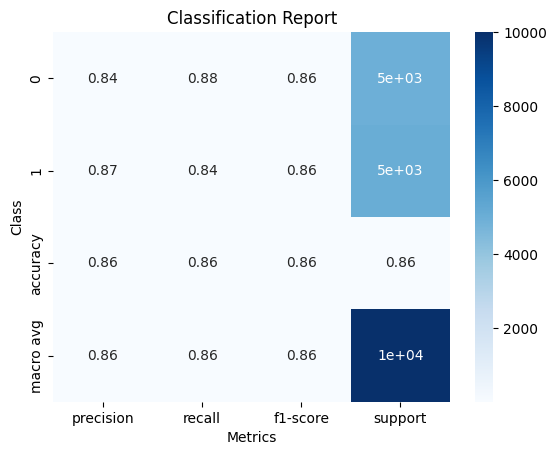

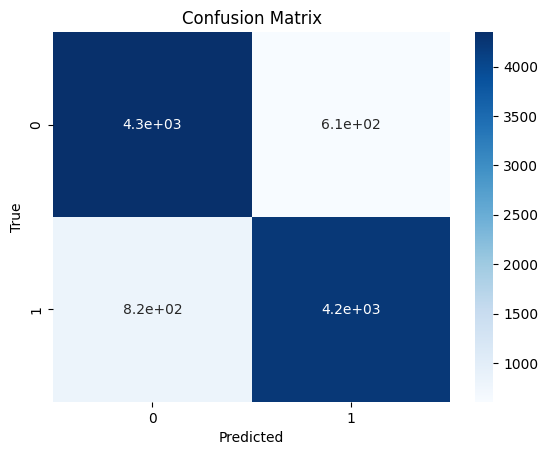

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
report = classification_report(Y_test, prediction_on_test_data, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].astype(float), annot=True, cmap='Blues')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')
plt.show()

cm = confusion_matrix(Y_test, prediction_on_test_data)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **LSTM**

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



df = pd.read_csv('IMDB Dataset.csv')


df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})


x_train, x_val, y_train, y_val = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_val_seq = tokenizer.texts_to_sequences(x_val)
vocab_size = len(tokenizer.word_index) + 1
maxlen = 300
x_train_padded = pad_sequences(x_train_seq, maxlen=maxlen, padding='post')
x_val_padded = pad_sequences(x_val_seq, maxlen=maxlen, padding='post')


embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
with open('glove.6B.100d.txt', 'r') as f:
    for line in f:
        word, *vector = line.split()
        if word in tokenizer.word_index:
            idx = tokenizer.word_index[word]
            embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]


model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(x_train_padded, y_train, epochs=25, batch_size=128, validation_data=(x_val_padded, y_val))


y_pred = model.predict(x_val_padded)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]
lstm_report = classification_report(y_val, y_pred, output_dict=True)
print(classification_report(y_val, y_pred))


Epoch 1/25
313/313 [==============================] - 174s 548ms/step - loss: 0.6835 - accuracy: 0.5345 - val_loss: 0.6678 - val_accuracy: 0.5579
Epoch 2/25
313/313 [==============================] - 172s 549ms/step - loss: 0.6780 - accuracy: 0.5440 - val_loss: 0.7362 - val_accuracy: 0.5043
Epoch 3/25
313/313 [==============================] - 177s 566ms/step - loss: 0.6805 - accuracy: 0.5344 - val_loss: 0.6474 - val_accuracy: 0.5717
Epoch 4/25
313/313 [==============================] - 177s 567ms/step - loss: 0.6642 - accuracy: 0.5565 - val_loss: 0.6450 - val_accuracy: 0.5814
Epoch 5/25
313/313 [==============================] - 178s 568ms/step - loss: 0.7037 - accuracy: 0.5321 - val_loss: 0.6859 - val_accuracy: 0.5284
Epoch 6/25
313/313 [==============================] - 177s 566ms/step - loss: 0.6712 - accuracy: 0.5683 - val_loss: 0.6845 - val_accuracy: 0.5292
Epoch 7/25
313/313 [==============================] - 178s 570ms/step - loss: 0.6583 - accuracy: 0.5740 - val_loss: 0.5504 -

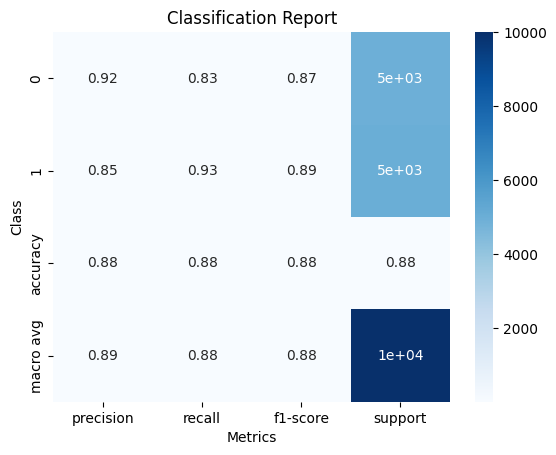

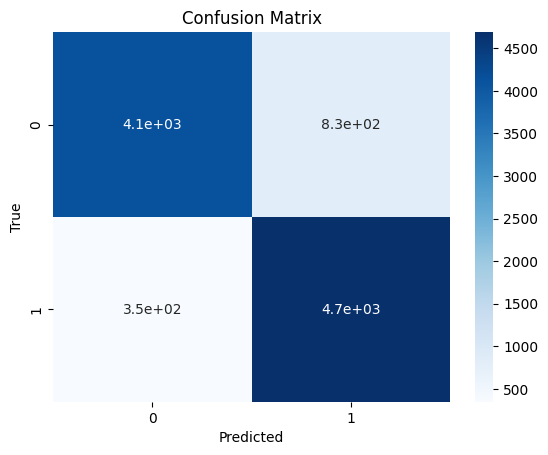

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
report = classification_report(y_val, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
sns.heatmap(df.iloc[:-1, :].astype(float), annot=True, cmap='Blues')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')
plt.show()

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Comparing the models :**

Using a bar graph is a good choice in this case as It clearly shows the differences in performance between the models. Bar graphs allow for a direct visual comparison between multiple values, making it easy to see which model has the highest and lowest macro avg f1_score. It is easy to read and interpret. Bar graphs are a common type of chart that most people are familiar with. The axis labels and tick marks make it easy to read the values, and the bars themselves provide a clear and intuitive visual representation of the values. It is suitable for discrete categories. In this case, we are comparing three distinct models, which makes a bar graph a suitable choice. Bar graphs work well when there are a small number of categories to compare, and when the categories are discrete (i.e., not continuous).

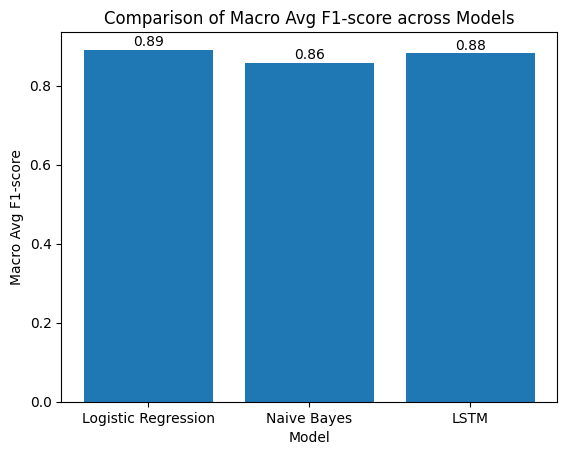

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
logreg_report = lr_report
naivebayes_report = nb_report
lstm_report = lstm_report
macro_f1_scores = [logreg_report['macro avg']['f1-score'],
                  naivebayes_report['macro avg']['f1-score'],
                  lstm_report['macro avg']['f1-score']]
models = ['Logistic Regression', 'Naive Bayes', 'LSTM']
plt.bar(models, macro_f1_scores)
plt.xlabel("Model")
plt.ylabel("Macro Avg F1-score")
plt.title("Comparison of Macro Avg F1-score across Models")
for i, score in enumerate(macro_f1_scores):
    plt.text(i, score+0.01, str(round(score, 2)), horizontalalignment='center')
plt.show()

The logistic regression model has the highest macro F1-score of 0.89, followed by LSTM with 0.88, and then naive Bayes with 0.86. This suggests that the logistic regression model has better overall performance in classification tasks compared to the other two models. However, the difference in performance between the models is relatively very small
